<a href="https://colab.research.google.com/github/itspallavi20/Oral_Diseases_Prediction/blob/main/models/InceptionNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import seaborn as sns
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import numpy as np

In [ ]:
train_dir = '/content/drive/MyDrive/Oral_Diseases_Project/Dataset/Train'
val_dir = '/content/drive/MyDrive/Oral_Diseases_Project/Dataset/Validation'

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False

In [ ]:
custom_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])
custom_model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(299, 299), batch_size=32, class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(299, 299), batch_size=32, class_mode='categorical'
)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Oral_Diseases_Project/Dataset/Train'

In [ ]:
custom_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = custom_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[checkpoint, early_stopping]
)
val_loss, val_accuracy = custom_model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

NameError: name 'train_generator' is not defined

In [ ]:
avg_train_accuracy = sum(train_accuracy) / len(train_accuracy)
avg_val_accuracy = sum(val_accuracy) / len(val_accuracy)
print(f"Average Training Accuracy: {avg_train_accuracy:.4f}")
print(f"Average Validation Accuracy: {avg_val_accuracy:.4f}")

Average Training Accuracy: 0.8729
Average Validation Accuracy: 0.8304


Average Training Accuracy: 0.8729
Average Validation Accuracy: 0.8304
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 587ms/step
Confusion Matrix:
 [[ 0  2 17  9  1  0]
 [ 0  0 11  6  1  0]
 [ 4  7 93 72 18  6]
 [ 4  7 76 51  8  7]
 [ 0  2 16 10  0  2]
 [ 0  0  9  7  2  1]]


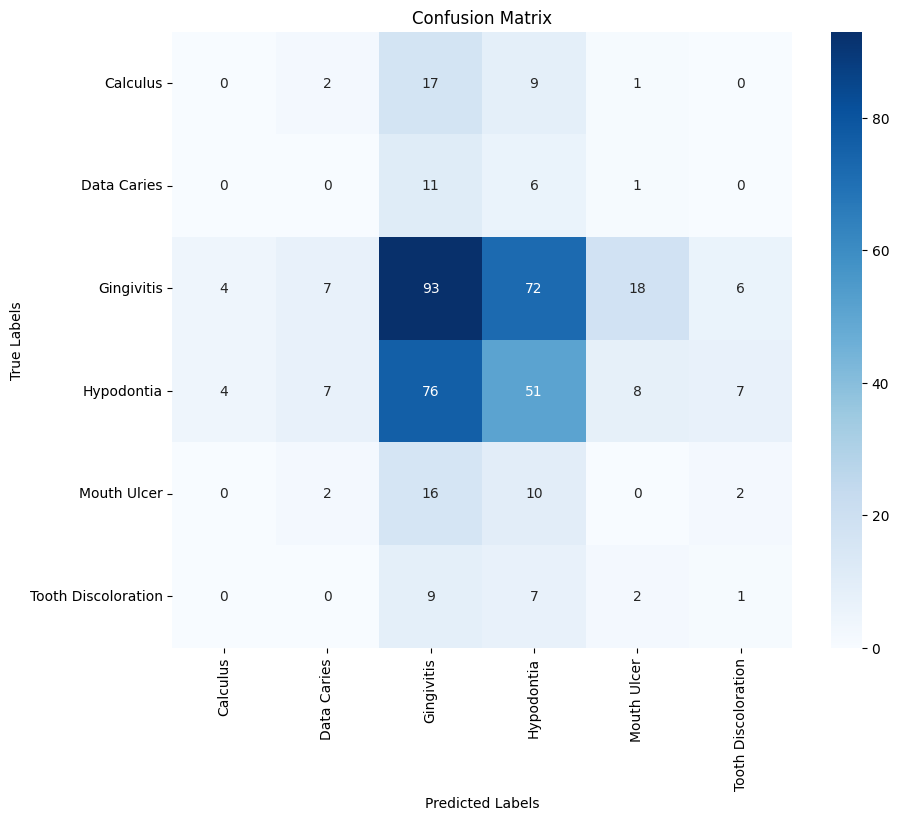


Classification Report:
                      precision    recall  f1-score   support

           Calculus       0.00      0.00      0.00        29
        Data Caries       0.00      0.00      0.00        18
         Gingivitis       0.42      0.47      0.44       200
         Hypodontia       0.33      0.33      0.33       153
        Mouth Ulcer       0.00      0.00      0.00        30
Tooth Discoloration       0.06      0.05      0.06        19

           accuracy                           0.32       449
          macro avg       0.14      0.14      0.14       449
       weighted avg       0.30      0.32      0.31       449

Accuracy: 0.3229
Precision: 0.3014
Sensitivity (Recall): 0.3229
F1 Score: 0.3116
Specificity: 0.5463


In [ ]:
average_training_accuracy = np.mean(history.history['accuracy'])
average_validation_accuracy = np.mean(history.history['val_accuracy'])

print(f"Average Training Accuracy: {average_training_accuracy:.4f}")
print(f"Average Validation Accuracy: {average_validation_accuracy:.4f}")

val_preds = custom_model.predict(val_generator, verbose=1)
val_preds_classes = np.argmax(val_preds, axis=1)
val_labels = val_generator.classes

conf_matrix = confusion_matrix(val_labels, val_preds_classes)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

report = classification_report(val_labels, val_preds_classes, target_names=val_generator.class_indices.keys())
print("\nClassification Report:\n", report)

accuracy = accuracy_score(val_labels, val_preds_classes)
precision = precision_score(val_labels, val_preds_classes, average='weighted')
sensitivity = recall_score(val_labels, val_preds_classes, average='weighted')
f1 = f1_score(val_labels, val_preds_classes, average='weighted')

TN = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - np.diag(conf_matrix)
specificity_per_class = TN / (TN + FP)
specificity = np.mean(specificity_per_class)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")
